#Airline Passengers Forecasting Using the Holt-Winters Method

* Simple Exponential Smoothing / Simple Moving Average
This is the simplest to forecast.  y^  is equal to the most recent value in the dataset, and the forecast plot is simply a horizontal line extending from the most recent value.

* Double Exponential Smoothing / Holt's Method
This model takes trend into account. Here the forecast plot is still a straight line extending from the most recent value, but it has slope.

* Triple Exponential Smoothing / Holt-Winters Method
This model has (so far) the "best" looking forecast plot, as it takes seasonality into account. When we expect regular fluctuations in the future, this model attempts to map the seasonal behavior.

##Step1: Loading The Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
path="/content/drive/MyDrive/WorkSpace2/GIT/Time-Series-Analysis/Data/"

In [3]:
df=pd.read_csv(path+"airline_passengers.csv") #index_col='Month',parse_dates=True
df.head(2)

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118


In [4]:
#df.dropna(inplace=True)
df['Thousands of Passengers'].isna().sum()

0

##Step2: Setting The Index

In [5]:
"""df=pd.read_csv(path+"airline_passengers.csv",index_col='Month',parse_dates=True) #index_col='Month',parse_dates=True
df.head(2)"""
"""
import statsmodels.api as sm
#min(df['Month']),max(df['Month'])
#df.index=pd.Index(sm.tsa.datetools.dates_from_range('1949','1960'))
"""
# Parse strings to datetime type
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)
df = df.set_index(['Month'])
df.head(2)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118


##Step3: Setting a DatetimeIndex Frequency




* Note that our DatetimeIndex does not have a frequency. 
In order to build a Holt-Winters smoothing model, 
* statsmodels needs to know the frequency 
of the data (whether it's daily, monthly etc.). 
Since observations occur at the start of  each month, we'll use MS.
* A full list of time series offset aliases can be found here.
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases




In [6]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

##Step4: Train Test Split

In [7]:
train_data = df.iloc[:108] # Goes up to but not including 108
test_data = df.iloc[108:]
print(train_data.shape,test_data.shape)

(108, 1) (36, 1)


##Step5: Fitting the Model

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
fitted_model

##Step6: Evaluating Model against Test Set

In [10]:
test_predictions = fitted_model.forecast(36).rename('HW Forecast')
print(test_predictions.shape)

(36,)


In [11]:
test_predictions

1958-01-01    356.739143
1958-02-01    343.561234
1958-03-01    403.996804
1958-04-01    397.853537
1958-05-01    406.415919
1958-06-01    479.824369
1958-07-01    529.820371
1958-08-01    524.772030
1958-09-01    454.714920
1958-10-01    391.965458
1958-11-01    345.259663
1958-12-01    395.243838
1959-01-01    407.506420
1959-02-01    392.453174
1959-03-01    461.489283
1959-04-01    454.471773
1959-05-01    464.252661
1959-06-01    548.107812
1959-07-01    605.218708
1959-08-01    599.451941
1959-09-01    519.425056
1959-10-01    447.745766
1959-11-01    394.393305
1959-12-01    451.490690
1960-01-01    465.498351
1960-02-01    448.302888
1960-03-01    527.163474
1960-04-01    519.147307
1960-05-01    530.320106
1960-06-01    626.108620
1960-07-01    691.346924
1960-08-01    684.759493
1960-09-01    593.344043
1960-10-01    511.464127
1960-11-01    450.519118
1960-12-01    515.741989
Freq: MS, Name: HW Forecast, dtype: float64

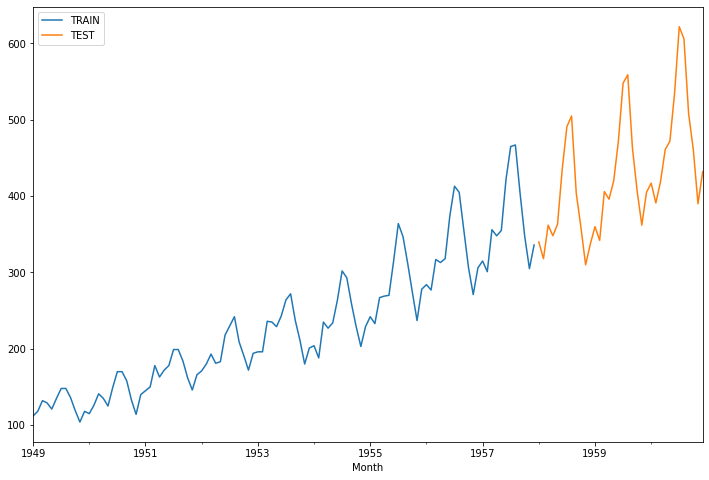

In [12]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

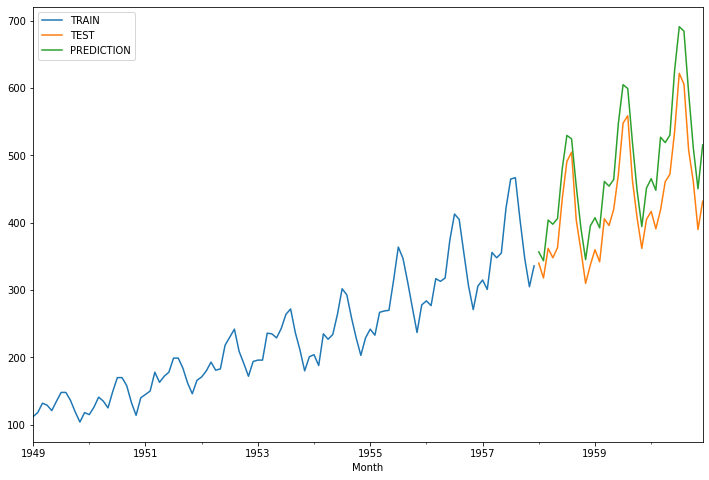

In [13]:
#Prediction plot -Forcasting plot
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

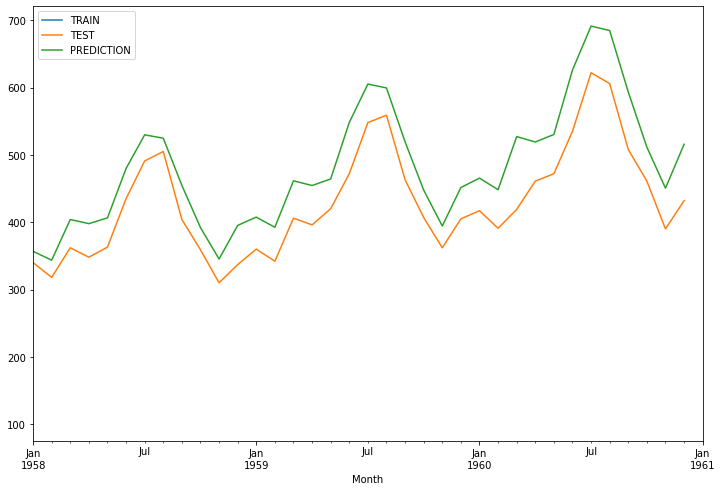

In [14]:
#On Zoom scale
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01']);

##Step7: Save the predicted output in dataframe

In [24]:
test_predictions.index

DatetimeIndex(['1958-01-01', '1958-02-01', '1958-03-01', '1958-04-01',
               '1958-05-01', '1958-06-01', '1958-07-01', '1958-08-01',
               '1958-09-01', '1958-10-01', '1958-11-01', '1958-12-01',
               '1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01',
               '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
               '1959-09-01', '1959-10-01', '1959-11-01', '1959-12-01',
               '1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
               '1960-09-01', '1960-10-01', '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [26]:
predicted_df=pd.DataFrame(test_predictions.values.reshape(-1,1),columns=["Passengers"],index=test_predictions.index)
predicted_df

,Passengers
1958-01-01,356.739143
1958-02-01,343.561234
1958-03-01,403.996804
1958-04-01,397.853537
1958-05-01,406.415919
1958-06-01,479.824369
1958-07-01,529.820371
1958-08-01,524.772030
1958-09-01,454.714920
1958-10-01,391.965458


##Step8: Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
mean_absolute_error(test_data,test_predictions)

30.24228895401259

In [ ]:
mean_squared_error(test_data,test_predictions)

1143.4649378653387

In [ ]:
np.sqrt(mean_squared_error(test_data,test_predictions))

33.815158403670665

In [ ]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


##Step9: Forecasting into Future -Build the Final Model

In [ ]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [ ]:
forecast_predictions = final_model.forecast(36)

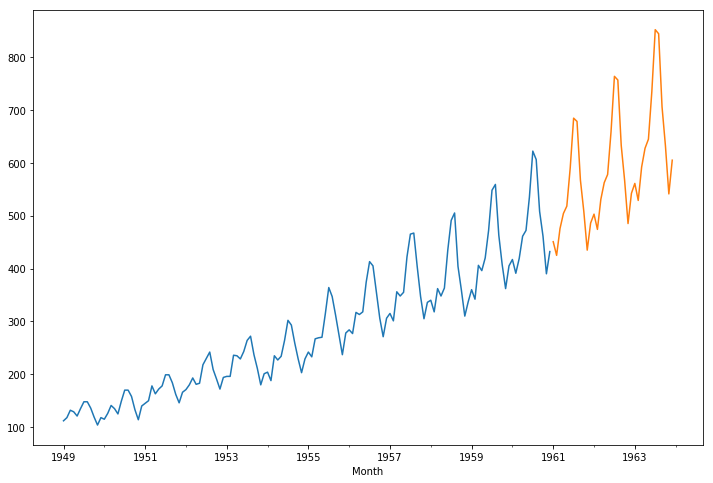

In [ ]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot();